<a href="https://colab.research.google.com/github/saniya1027108/CarPricePrediction/blob/main/CarPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saniyamulla10","key":"0bd3a2cdca77e2a55ac997f6ab2eeb15"}'}

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets list

ref                                                           title                                              size  lastUpdated          downloadCount  
------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                   Reddit Vaccine Myths                              232KB  2021-06-27 12:35:43           8379  
crowww/a-large-scale-fish-dataset                             A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           5141  
imsparsh/musicnet-dataset                                     MusicNet Dataset                                   22GB  2021-02-18 14:12:19           1748  
promptcloud/careerbuilder-job-listing-2020                    Careerbuilder Job Listing 2020                     42MB  2021-03-05 06:59:52           1169  
coloradokb/dandelionimages                                    Da

In [6]:
! kaggle datasets download -d hellbuoy/car-price-prediction

  0% 0.00/18.1k [00:00<?, ?B/s]
100% 18.1k/18.1k [00:00<00:00, 3.50MB/s]


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [8]:
! unzip car-price-prediction.zip

Archive:  car-price-prediction.zip
  inflating: CarPrice_Assignment.csv  
  inflating: Data Dictionary - carprices.xlsx  


In [10]:
carprice = pd.read_csv("/content/CarPrice_Assignment.csv")
carprice.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [11]:
carprice.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [12]:
carprice.keys()

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [13]:
na_data=carprice.isna().sum()
print(na_data)

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [15]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

In [16]:
carprice['CarName']= label_encoder.fit_transform(carprice['CarName'])
carprice['CarName'].unique()

array([  2,   3,   1,   4,   5,   9,   7,   6,   8,  10,  11,  12,  15,
        13,  14,  24,  25,  26,  35,  27,  32,  34,  29,  28,  30,  33,
        31,  39,  43,  37,  38,  42,  36,  41,  44,  40,  47,  45,  46,
        49,  48,  50,  52,  51,  61,  59,  58,  53,  54,  60,  55,  57,
        56,  19,  17,  16,  22,  20,  23,  18,  21,  62,  65,  64,  68,
        63,  66,  67,  69,   0,  73,  81,  76,  83,  77,  74,  78,  70,
        79,  71,  72,  80,  82,  75,  85,  84,  86,  88,  87,  92,  89,
        93,  91,  94,  90,  98,  95,  97,  96,  99, 100, 101, 103, 102,
       104, 107, 106, 105, 108, 109, 110, 111, 123, 120, 116, 121, 117,
       112, 125, 115, 118, 114, 119, 122, 126, 127, 124, 113, 128, 129,
       130, 133, 137, 131, 136, 132, 145, 146, 134, 135, 139, 138, 140,
       141, 143, 144, 142])

As we are to train a linear regression model lets see the linear correlation between the different features of the dataset.

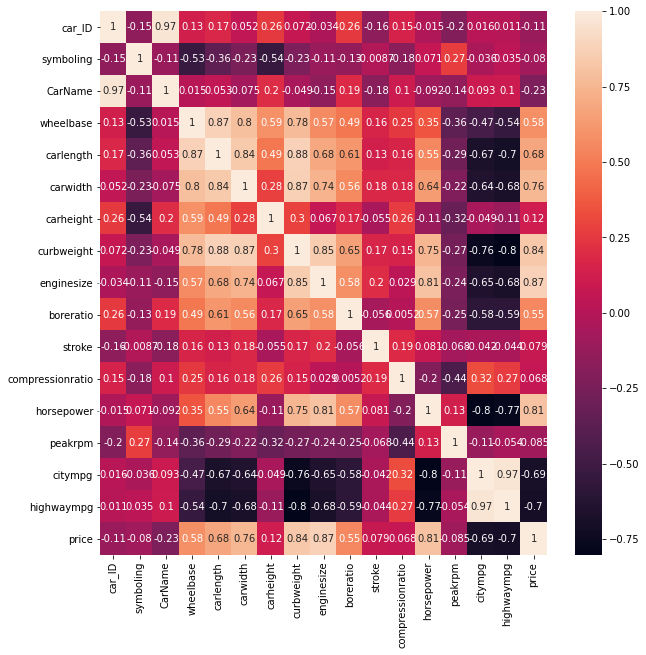

In [17]:
correlation_matrix=carprice.corr()
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sn.heatmap(data=correlation_matrix,annot=True)

VISUALIZATION:  Plotting the graph of a feature variables vs the target variable 'price'


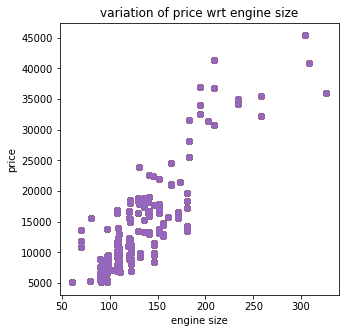

In [18]:
plt.figure(figsize=(5,5))
features=carprice.enginesize
target=carprice.price
for i in enumerate (features):
    x=features
    y=target
    plt.scatter(x,y)
    plt.title("variation of price wrt engine size")
    plt.xlabel("engine size")
    plt.ylabel("price")

<function matplotlib.pyplot.show>

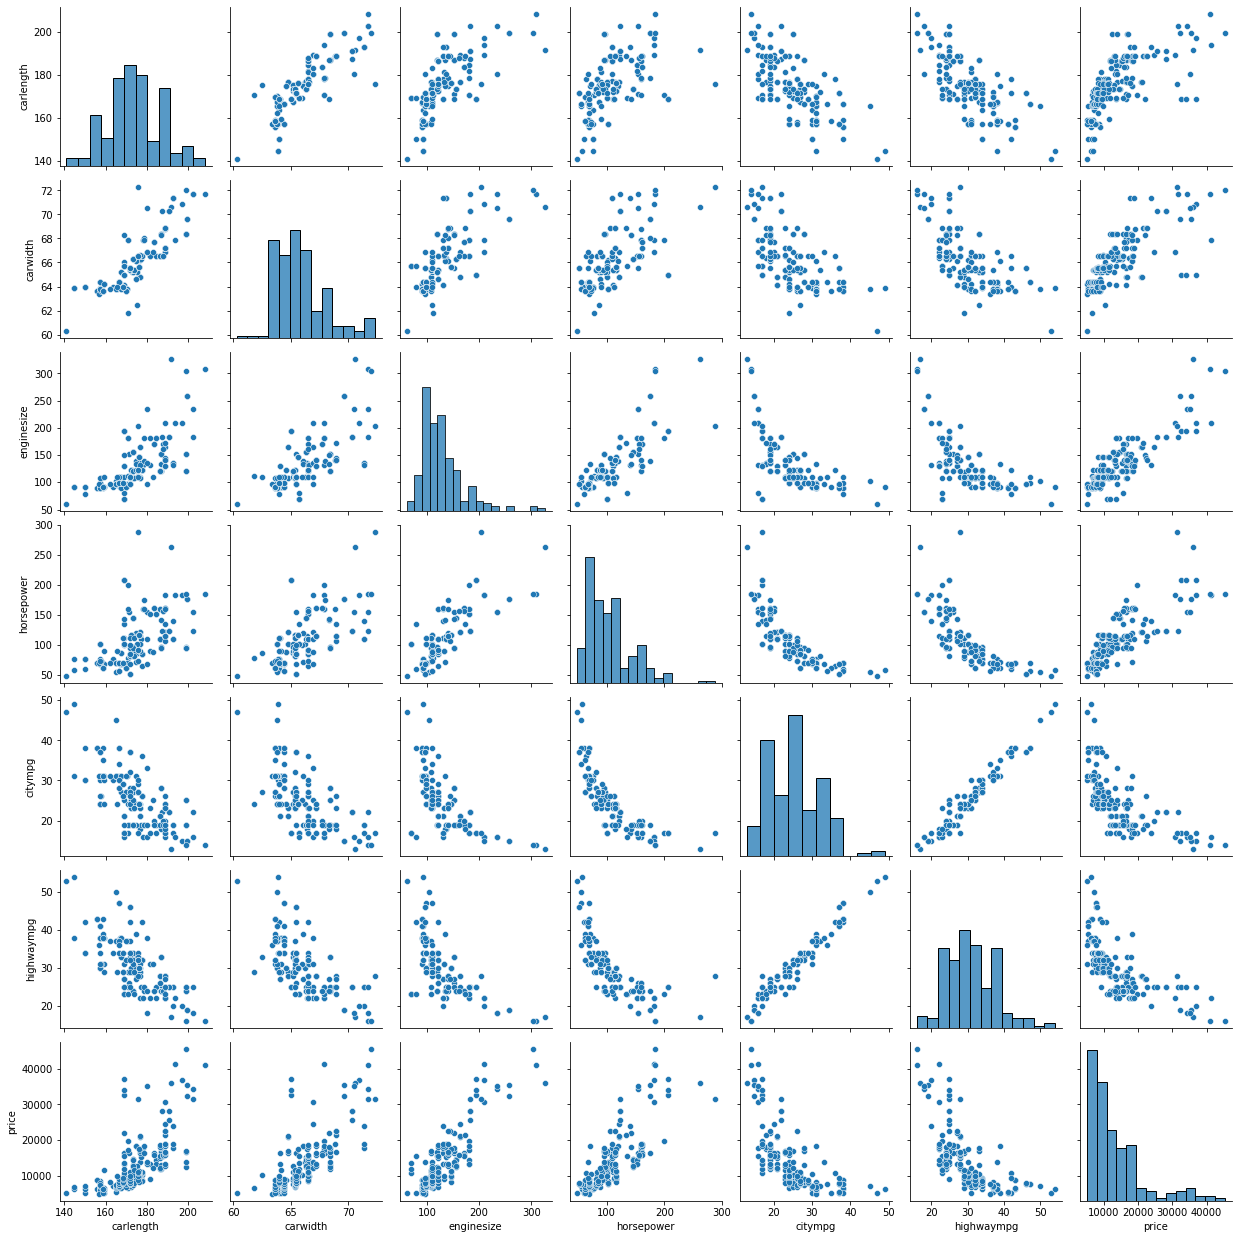

In [19]:
x = carprice[["carlength","carwidth","enginesize","horsepower","citympg","highwaympg"]]
Y= carprice["price"]
data= carprice[["carlength","carwidth","enginesize","horsepower","citympg","highwaympg","price"]]
pair_plot=sn.pairplot(data=data)
plt.show

In [20]:
x=carprice[['enginesize','horsepower']]
y=carprice['price']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state= 10)
print (x_train.shape)
print (x_test.shape)
print(y_train.shape)
print(y_test.shape)

(174, 2)
(31, 2)
(174,)
(31,)


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()  # Make an instance of the model
lin_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

PREDICTIONS ON TEST DATASET

In [22]:
y_train_predict = lin_model.predict(x_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))

print("The model performance for training set")
print('RMSE is {}'.format(rmse))
print("\n")

# on testing set
y_test_predict = lin_model.predict(x_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

print("The model performance for testing set")
print('RMSE is {}'.format(rmse))

from sklearn.metrics import r2_score
print(r2_score(y_test,y_test_predict))

The model performance for training set
RMSE is 3421.3433261993237


The model performance for testing set
RMSE is 4906.493017219121
0.46947807598842184


Text(0, 0.5, 'Predicted')

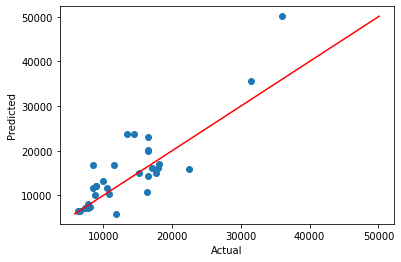

In [23]:
plt.scatter(y_test, y_test_predict)

plt.plot([min(y_test_predict),max(y_test_predict)],[min(y_test_predict),max(y_test_predict)], color='red')

plt.xlabel('Actual')
plt.ylabel('Predicted')

FITTING THE LINEAR REGRESSION MODEL USING OTHER VARIABLES

In [24]:
x=carprice[['enginesize','horsepower','stroke','compressionratio','peakrpm','citympg', 'highwaympg']]
y=carprice['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state=5)
lin_model.fit(x_train, y_train)

y_train_predict = lin_model.predict(x_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))

print("The model performance for training set")
print('RMSE is {}'.format(rmse))
print("\n")

# on testing set
y_test_predict = lin_model.predict(x_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

print("The model performance for testing set")
print('RMSE is {}'.format(rmse))

from sklearn.metrics import r2_score
print(r2_score(y_test,y_test_predict))

The model performance for training set
RMSE is 3401.8608452691024


The model performance for testing set
RMSE is 2136.2572889811468
0.9108063038577614


PLOT THE GRAPH

Text(0, 0.5, 'Predicted')

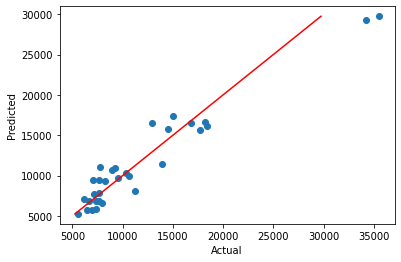

In [25]:
plt.scatter(y_test, y_test_predict)

plt.plot([min(y_test_predict),max(y_test_predict)],[min(y_test_predict),max(y_test_predict)], color='red')

plt.xlabel('Actual')
plt.ylabel('Predicted')